In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

import graph_tools

# SIR dynamics on facebook network

## Instantiate a model with parameters

In [2]:
# Network selection
g = nx.read_edgelist('facebook_combined.txt', create_using = nx.Graph(), nodetype=int)

# Dynamical Model Configuration
model = ep.SIRModel(g)

cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.1)
cfg.add_model_parameter('gamma', 0.05)
cfg.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(cfg)



### Network characteristics

Nodes:  4039
Edges:  88234
Average degree:  21.84550631344392


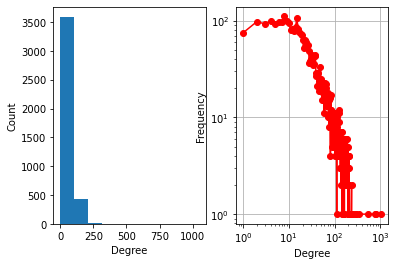

In [10]:
# Nework degree distribution
degrees, values, keys = graph_tools.degree_dist(g)

# Nework statistics
avg_deg = float(g.size()) / g.order()
print("Nodes: ", g.order())
print("Edges: ", g.size())
print("Average degree: ", avg_deg)

# Plot degree distribution
# histogram
plt.subplot(121)
plt.hist(degrees)
plt.ylabel("Count")
plt.xlabel("Degree")

# Frequency
plt.subplot(122)
plt.loglog(keys, values, 'ro-')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

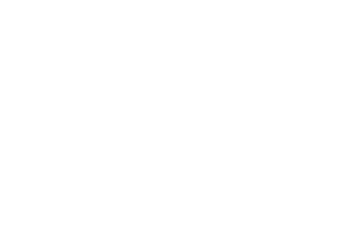

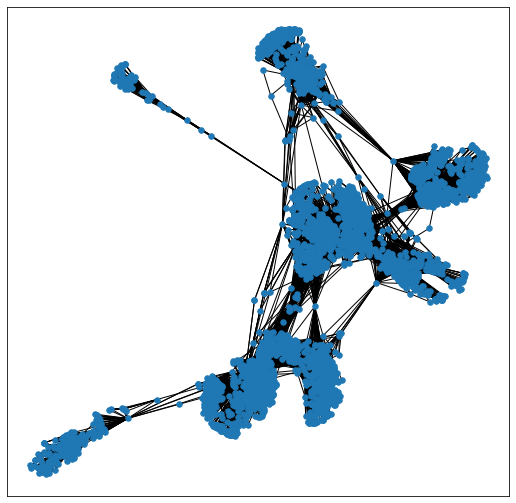

In [11]:
# Show network
sp = nx.spring_layout(g)
plt.axis('off')
plt.figure(figsize = (9,9))
nx.draw_networkx(g, pos = sp, with_labels = False, node_size = 30)
plt.show()

## Simulation execution

In [5]:
number_of_iteration = 100
iterations = model.iteration_bunch(number_of_iteration)

100%|██████████| 100/100 [00:00<00:00, 112.22it/s]


## Visualisation

Text(0, 0.5, '# nodes')

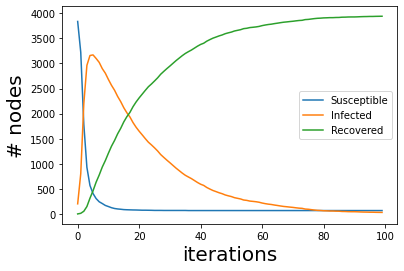

In [6]:
# Plot dynamics of SIR
susceptible_count = [iteration["node_count"][0] for iteration in iterations]
infected_count = [iteration["node_count"][1] for iteration in iterations]
recovered_count = [iteration["node_count"][2] for iteration in iterations]

plt.plot(susceptible_count, label = "Susceptible")
plt.plot(infected_count, label = "Infected")
plt.plot(recovered_count, label = "Recovered")
plt.legend()
plt.xlabel("iterations", fontsize=20)
plt.ylabel("# nodes", fontsize=20)

# Visualisation of information spreading on a small network

In [7]:
# Network selection
g_small = nx.watts_strogatz_graph(n=100, k=3, p=0.5) # p=1 -> all-to-all connectivity

# Dynamical Model Configuration
model_small = ep.SIRModel(g_small)

cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.5)
cfg.add_model_parameter('gamma', 0.1)
cfg.add_model_parameter("fraction_infected", 0.05)
model_small.set_initial_status(cfg)

In [8]:
# Simulation
number_of_iteration = 3
iterations_small = model_small.iteration_bunch(number_of_iteration)

100%|██████████| 3/3 [00:00<00:00, 4367.55it/s]


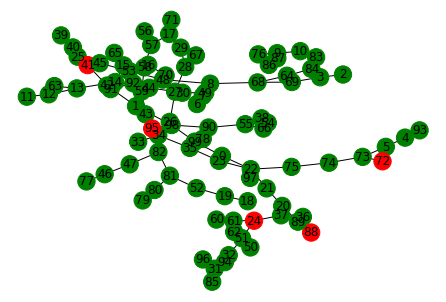

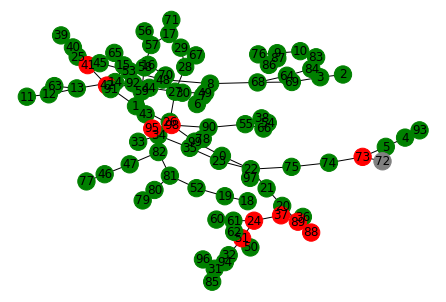

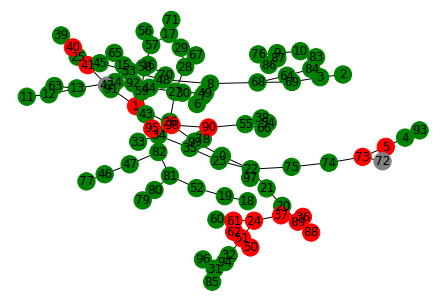

In [9]:
# Network layout
positions_small = nx.spring_layout(g_small)

# Plot information spreading
graph_tools.visualise_simulations(g_small, positions_small, iterations_small)